In [89]:
from skimage.io import imread, imsave
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from collections import Counter, OrderedDict

In [2]:
original = imread('lettuce_masked_for_manip_clean.png')
original = original[:,:,:3]
hsv_image = rgb2hsv(original[:,:,:3])

## to do

Mak it so that I can change the red channel where pixels != [0,0,0] and therfore not make the background black.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


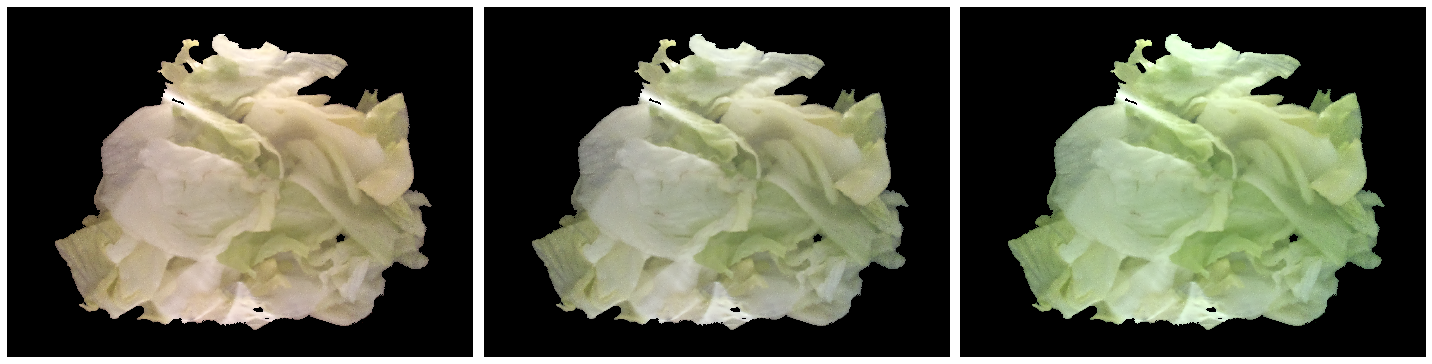

In [95]:
def tri_plot(im1, im2, im3):
    fig, ax = plt.subplots(1,3, figsize = (20,20))
    ax[0].imshow(im1)
    ax[0].axis('off')
    ax[1].imshow(im2)
    ax[1].axis('off')
    ax[2].imshow(im3)
    ax[2].axis('off')
    plt.tight_layout()
    
tri_plot(red_shift_image, original, greened)


In [104]:
def plot_hist(hsv_image):

    h = hsv_image[:,:,0]
    h  = np.around(h * 180, 0)
    #no idea why I have to do this twice each time
    index = np.argwhere(h==0)
    h = np.delete(h,index)

    index = np.argwhere(h==0)
    h = np.delete(h,index)

    c = Counter(h)
    
    
    sort_dict = OrderedDict(sorted(c.items(), key=lambda t: t[0])) #sorted(d.items(), key=lambda t: t[0])

    k,v = sort_dict.keys(), sort_dict.values()

    k = list(k)
    k = [i*2 for i in k]
    col_map = cm.get_cmap('hsv')
    plt.figure(figsize = (16,9))
    plt.bar(k,v, color =[col_map(int(i)) for i in k])
    plt.xlabel('hue angle')
    plt.ylabel('number of pixels')
    
    
   
plot_hist(hsv_image)


In [78]:
red_shift_image = original.copy()


In [79]:
red_shift_image[1000,1000]

array([174, 176, 167], dtype=uint8)

In [80]:
r = red_shift_image[:,:,0]

In [81]:
mask = (r == 0)


In [82]:
red_shift_image = red_shift_image + [20,0,0]

In [83]:
red_shift_image[mask] = [0,0,0]

In [84]:
red_shift_image[1000,1000]

array([194, 176, 167])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


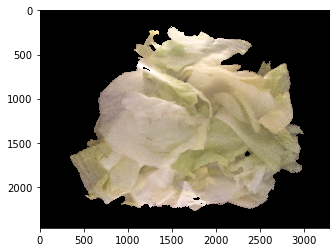

In [85]:
plt.imshow(red_shift_image)

0.050770765557340745


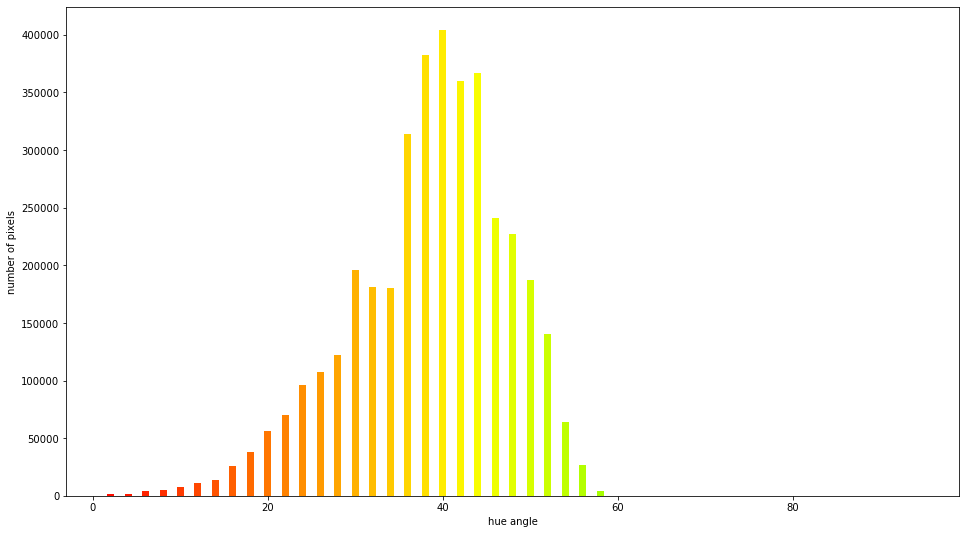

In [103]:
hsv_image_red_shift = rgb2hsv(red_shift_image)
print(np.mean(hsv_image_red_shift[:,:,0]))
plot_hist(hsv_image_red_shift)

In [90]:
imsave('red_shift_20r.png',red_shift_image)

<ipython-input-90-b353db2c3a0c>:1: UserWarning: red_shift_20r.png is a low contrast image
  imsave('red_shift_20r.png',red_shift_image)
Lossy conversion from int64 to uint8. Range [0, 275]. Convert image to uint8 prior to saving to suppress this warning.


In [91]:
green_shift_image = original.copy()
greened = green_shift_image + [0,20,0]
greened[mask] = [0,0,0]

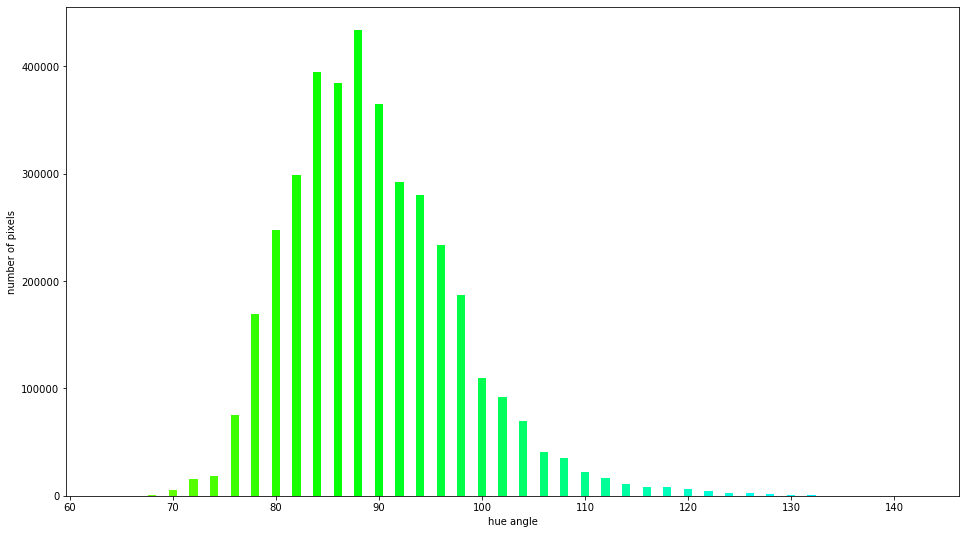

In [105]:
plot_hist(rgb2hsv(greened))

In [97]:
imsave('green_shift_20g.png',greened)

<ipython-input-97-ca18fce9a018>:1: UserWarning: green_shift_20g.png is a low contrast image
  imsave('green_shift_20g.png',greened)
Lossy conversion from int64 to uint8. Range [0, 275]. Convert image to uint8 prior to saving to suppress this warning.
